# Project: Speed Dating Exploratory Data Analysis
### https://www.kaggle.com/datasets/ulrikthygepedersen/speed-dating

## Introduction

This speed dating dataset contains detailed information collected during an experimental speed dating event. Each row in our data represents a single speed dating interaction, with partticaipants prociding ratings and prefeerences regarding their dating partners.

It covers a wide range of information about our subjects and their interactions, such as:

- Demographic information: gender, age race
- Self assesments: participant ratings of their atractiveness, sincerity, intelligence, humour, ambition and shared interests
- Partner assesments: ratings of partners based on these same attributes
- Data over a period of time: participants contributed information at multiple stages after the event

This complete dataset allows for an analysis of human behaviours, what people search for in a date, and an exploration of the differences between judgemnets and reality. Hopefully, by examining the relationships between different variables, we can gain insight into the complex dynamics of human relations and interactions.

## 1. Notebook setup

### 1.1 Module imports

In [36]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import seaborn as sns
import matplotlib as plt

# Utilities
import os

In [37]:
# Change pandas column and row limits
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 12)
pd.set_option('display.precision', 3)
pd.options.display.float_format = '{:.4f}'.format

### 1.2 Data import

In [38]:
data = pd.read_csv(r"speed_dating_data.csv",
                 encoding='cp1252',
                 )

data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0000,0,1,1,1,10,7,NaN,4,1,11.0000,0,0.1400,0,27.0000,2.0000,35.0000,20.0000,20.0000,20.0000,0.0000,5.0000,0,6.0000,8.0000,8.0000,8.0000,8.0000,6.0000,7.0000,4.0000,2.0000,21.0000,Law,1.0000,NaN,NaN,NaN,4.0000,2.0000,4.0000,Chicago,"60,521","69,487.00",2.0000,7.0000,1.0000,lawyer,NaN,9.0000,2.0000,8.0000,9.0000,1.0000,1.0000,5.0000,1.0000,5.0000,6.0000,9.0000,1.0000,10.0000,10.0000,9.0000,8.0000,1.0000,3.0000,2.0000,15.0000,20.0000,20.0000,15.0000,15.0000,15.0000,NaN,NaN,NaN,NaN,NaN,NaN,35.0000,20.0000,15.0000,20.0000,5.0000,5.0000,6.0000,8.0000,8.0000,8.0000,7.0000,NaN,NaN,NaN,NaN,NaN,1,6.0000,9.0000,7.0000,7.0000,6.0000,5.0000,7.0000,6.0000,2.0000,4.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0000,2.0000,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,19.4400,16.6700,13.8900,22.2200,11.1100,16.6700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0000,7.0000,8.0000,7.0000,6.0000,NaN,NaN,NaN,NaN,NaN,1.0000,1.0000,0.0000,NaN,NaN,15.0000,20.0000,20.0000,15.0000,15.0000,15.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0000,7.0000,7.0000,7.0000,7.0000,NaN,NaN,NaN,NaN,NaN
1,1,1.0000,0,1,1,1,10,7,NaN,3,2,12.0000,0,0.5400,0,22.0000,2.0000,60.0000,0.0000,0.0000,40.0000,0.0000,0.0000,0,7.0000,8.0000,10.0000,7.0000,7.0000,5.0000,8.0000,4.0000,2.0000,21.0000,Law,1.0000,NaN,NaN,NaN,4.0000,2.0000,4.0000,Chicago,"60,521","69,487.00",2.0000,7.0000,1.0000,lawyer,NaN,9.0000,2.0000,8.0000,9.0000,1.0000,1.0000,5.0000,1.0000,5.0000,6.0000,9.0000,1.0000,10.0000,10.0000,9.0000,8.0000,1.0000,3.0000,2.0000,15.0000,20.0000,20.0000,15.0000,15.0000,15.0000,NaN,NaN,NaN,NaN,NaN,NaN,35.0000,20.0000,15.0000,20.0000,5.0000,5.0000,6.0000,8.0000,8.0000,8.0000,7.0000,NaN,NaN,NaN,NaN,NaN,1,7.0000,8.0000,7.0000,8.0000,5.0000,6.0000,7.0000,5.0000,1.0000,4.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0000,2.0000,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,19.4400,16.6700,13.8900,22.2200,11.1100,16.6700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0000,7.0000,8.0000,7.0000,6.0000,NaN,NaN,NaN,NaN,NaN,1.0000,1.0000,0.0000,NaN,NaN,15.0000,20.0000,20.0000,15.0000,15.0000,15.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0000,7.0000,7.0000,7.0000,7.0000,NaN,NaN,NaN,NaN,NaN
2,1,1.0000,0,1,1,1,10,7,NaN,10,3,13.0000,1,0.1600,1,22.0000,4.0000,19.0000,18.0000,19.0000,18.0000,14.0000,12.0000,1,10.0000,10.0000,10.0000,10.0000,10.0000,10.0000,10.0000,10.0000,1.0000,21.0000,Law,1.0000,NaN,NaN,NaN,4.0000,2.0000,4.0000,Chicago,"60,521","69,487.00",2.0000,7.0000,1.0000,lawyer,NaN,9.0000,2.0000,8.0000,9.00

### 1.3 Data overview

In [39]:
data.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.0000,8377.0000,8378.0000,8378.0000,8378.0000,8378.0000,8378.0000,8378.0000,6532.0000,8378.0000,8378.0000,8368.0000,8378.0000,8220.0000,8378.0000,8274.0000,8305.0000,8289.0000,8289.0000,8289.0000,8280.0000,8271.0000,8249.0000,8378.0000,8166.0000,8091.0000,8072.0000,8018.0000,7656.0000,7302.0000,8128.0000,8060.0000,7993.0000,8283.0000,8315,8296.0000,4914,3133,3583,8315.0000,8299.0000,8299.0000,8299,7314,4279,8299.0000,8281.0000,8299.0000,8289,8240.0000,8299.0000,8299.0000,8299.0000,8299.0000,8299.0000,8299.0000,8299.0000,8299.0000,8299.0000,8299.0000,8299.0000,8299.0000,8299.0000,8299.0000,8299.0000,8299.0000,8299.0000,8277.0000,1800.0000,8299.0000,8299.0000,8299.0000,8289.0000,8279.0000,8257.0000,6489.0000,6489.0000,6489.0000,6489.0000,6489.0000,6467.0000,8299.0000,8299.0000,8299.0000,8299.0000,8289.0000,8289.0000,8273.0000,8273.0000,8273.0000,8273.0000,8273.0000,4906.0000,4906.0000,4906.0000,4906.0000,4906.0000,8378.0000,8176.0000,8101.0000,8082.0000,8028.0000,7666.0000,7311.0000,8138.0000,8069.0000,8003.0000,7205.0000,4096.0000,4096.0000,4096.0000,4096.0000,4096.0000,4096.0000,4000.0000,4000.0000,4000.0000,4000.0000,4000.0000,7463.0000,7463.0000,7433.0000,1984.0000,1955.0000,1984.0000,1984.0000,1955.0000,1974.0000,7445.0000,7463.0000,7463.0000,7463.0000,7463.0000,7463.0000,5775.0000,5775.0000,5775.0000,5775.0000,5775.0000,5775.0000,5775.0000,5775.0000,5775.0000,5775.0000,5775.0000,5775.0000,7463.0000,7463.0000,7463.0000,7463.0000,7463.0000,4377.0000,4377.0000,4377.0000,4377.0000,4377.0000,3974.0000,3974.0000,3974.0000,1496.0000,668.0000,3974.0000,3974.0000,3974.0000,3974.0000,3974.0000,3974.0000,2016.0000,2016.0000,2016.0000,2016.0000,2016.0000,2016.0000,2959.0000,2959.0000,2959.0000,2959.0000,2959.0000,2959.0000,2959.0000,2959.0000,2959.0000,2959.0000,2959.0000,2016.0000,3974.0000,3974.0000,3974.0000,3974.0000,3974.0000,2016.0000,2016.0000,2016.0000,2016.0000,2016.0000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [40]:
total_non_missings = data.shape[0]*data.shape[1]
total_missings = data.isnull().values.sum()

print(f"There are {total_missings} missing values out of {total_non_missings} total values \
({round(total_missings/total_non_missings*100, 1)}%)")

There are 432016 missing values out of 1633710 total values (26.4%)


We have many missing values in our dataframe. Let's explore where and hopefully understand why.

## 2. Missing values

In [41]:
def get_missing_value_percentages(data):
    """
    Get percentage of missing values for every column in a dataframe.

    Args:
        data (dataframe): dataframe whose missing values will be counted

    Returns:
        missing_value_percentages (series): series where index is column and value is % missing values
    """
    missing_value_percentages = data.isnull().sum().apply(lambda x: round(x / len(data) * 100, 2))

    return missing_value_percentages

missing_value_percentages = get_missing_value_percentages(data)
missing_value_percentages

iid         0.0000
id          0.0100
gender      0.0000
idg         0.0000
condtn      0.0000
             ...  
attr5_3    75.9400
sinc5_3    75.9400
intel5_3   75.9400
fun5_3     75.9400
amb5_3     75.9400
Length: 195, dtype: float64

Let's take a look at how these missing values are distributed:

In [42]:
px.bar(x=missing_value_percentages.index, y=missing_value_percentages.values)

There is an evolution in the quantity of missing values as we look through the columns. This is due to how the dataset was collected.

The first columns contain values unique to each ID, such as their age, income and their interests. The remaining columns are organized in 5 waves (information filled out before the event, after each meeting, halfway through the event, a day after the event, and 3-4 weeks after the event). We can suppose that people got more and more disinterested as time went on and thus neglected contributing more and more information.

Let's group the columns by wave:

In [43]:
# Wave 00 corresponds to information filled out in order to register for the event
data_wave_00 = data.loc[:, 'iid':'amb5_1']

# Wave 01 corresponds to information filled out after each meeting
data_wave_01 = data.loc[:, 'dec':'met']

# Wave 02 corresponds to information filled out halfway throught the whole event
data_wave_02 = data.loc[:, 'attr1_s':'amb3_s']

# Wave 03 corresponds to information filled out the day after the event
data_wave_03 = data.loc[:, 'satis_2':'amb5_2']

# Wave 04 corresponds to information filled out 3-4 weeks after the event
data_wave_04 = data.loc[:, 'you_call':'amb5_3']

In [44]:
wave_dataframes = [data_wave_00, data_wave_01, data_wave_02, data_wave_03, data_wave_04]

missing_values_by_wave = {f'wave_{str(i)}' : wave.isna().sum().sum()\
    for i, wave in enumerate(wave_dataframes)}

missing_values_by_wave = pd.Series(missing_values_by_wave)

fig = px.bar(missing_values_by_wave)
fig.show()

Information filled out before the event and after each meeting is relatively complete (exuding specific personal information filled out before the event such as the participant's income, studies, tuition and SAT scores for example). The following waves, filled out halfway through the event, the day after and a month after all include significantly more missing values.

This progressive increase in missing values could be explained by an increasing disinterest towards the event.

## 3. Dataset presentation

### 3.1 Key explaining the nomeclature of the attribute columns:

1_ | Attribute looked for in other sex  
2_ | Attribute looked for by other sex  
3_ | Self-rating of attributes (based on your own opinion)  
4_ | Attribute looked for by other people of your sex  
5_ | Self-rating of attributes (based on what they thought others perceived)  
7_ | Rating of importance of attributes in terms of contribution to your decisions  

_1 | Filled out before event  
_2 | Filled out a day after the event  
_3 | Filled out 3-4 weeks after the event  
_s | Filled out halfway through the event  

### 3.2 What is in a row?

Each row in our dataset represents a single date between 2 participants of the opposite sex, viewed from the subject's perspective. For each data, there are 2 rows: one where a given participant is the subject, another where they are the partner.

Our subjects and partners are identified respectively by:
- unique ID 'iid', wave specific ID 'idg' or gender-specific/wave-specific ID 'id'
- unique ID 'pid' (corresponding to subject iid) or wave-specific ID 'partner' corresponding to 'id

## 4. How to get a second date?

### 4.1 What qualities make people match more and go on more dates?

First off, we will adjust our dataframe to only have 1 row per participant. This will allow us to compare their attributes to their match rate.

In [45]:
# First we will find all the columns that only contain 1 value per iid
nunique_per_iid = data.groupby('iid').nunique()
iid_specific_columns = nunique_per_iid.columns[nunique_per_iid.max() == 1].tolist()
iid_specific_columns.insert(0, 'iid')

# Create a grouped dataframe using our iid specific columns
data_by_iid = data[iid_specific_columns]
data_by_iid = data_by_iid.groupby('iid').first()

# Add a match rate column
data_by_iid['match_rate'] = data[['iid', 'match']].groupby('iid').agg('mean')

# Drop identifying columns, other non-indicators and reset index
data_by_iid = data_by_iid.drop(['id', 'idg', 'condtn'], axis = 1).reset_index()

Next, we find the correlation table of each feature to match rate and the chance of getting a second date.

In [46]:
data_corr = pd.concat([data_by_iid, data_by_iid['date_3'], data_by_iid['match_rate']])
corr = data_corr.corr(method='pearson', numeric_only=True).loc[:,['match_rate', 'date_3']].drop(['match_rate', 'date_3'], axis = 0)

We will use a cumulative sum to find the set of features that best predict whether or not someone has a high match rate.

In [47]:
corr['cum_sum_match'] = corr['match_rate'].sort_values(ascending=False).abs().cumsum()
corr['cum_sum_date'] = corr['date_3'].sort_values(ascending=False).abs().cumsum()
corr['cum_pct_match'] = corr['cum_sum_match'] / max(corr['cum_sum_match']) * 100
corr['cum_pct_date'] = corr['cum_sum_date'] / max(corr['cum_sum_date']) * 100


Let's look at the n most positively impactful attributes, and the n most negatively impactful attributes.

In [48]:
corr_trimmed_match = corr_trimmed_date = corr.copy()

corr_trimmed_match['match_rate_abs'] = abs(corr_trimmed_match['match_rate'])
corr_trimmed_date['date_3_abs'] = abs(corr_trimmed_match['date_3'])

n = 30
corr_trimmed_match = corr_trimmed_match.nlargest(n, 'match_rate_abs').drop_duplicates().sort_values(by='match_rate_abs', ascending=False)
corr_trimmed_date = corr_trimmed_date.nlargest(n, 'date_3_abs').drop_duplicates().sort_values(by='date_3_abs', ascending=False)

In [101]:
corr_trimmed_date['date_3'].sort_values(ascending=False, key=abs)

them_cal    0.4908
numdat_3    0.4409
num_in_3    0.3462
intel1_s    0.2964
you_call    0.2739
sinc7_2    -0.2098
imprace    -0.1817
shar2_3    -0.1687
fun4_1      0.1637
fun2_3      0.1612
attr1_s     0.1599
shar1_s    -0.1521
amb2_1      0.1487
fun5_1      0.1404
intel2_3    0.1346
amb3_2     -0.1337
satis_2     0.1330
hiking      0.1314
round       0.1293
fun7_3      0.1285
amb2_3      0.1271
sinc4_1    -0.1267
tv         -0.1241
fun7_2      0.1233
fun4_3      0.1203
shar2_2    -0.1197
gaming     -0.1195
intel3_s   -0.1144
fun4_2      0.1138
fun3_s     -0.1125
Name: date_3, dtype: float64

In [49]:
# Make subplots
correlation_fig = make_subplots(rows=2, cols=1, subplot_titles=("Match Rate Correlation", "Second Date Correlation"))

# Add plots
correlation_fig.add_trace(
    go.Bar(x=corr_trimmed_match.index, y=corr_trimmed_match['match_rate'], marker=dict(color=corr_trimmed_match['match_rate'])),
    row=1, col=1
)

correlation_fig.add_trace(
    go.Bar(x=corr_trimmed_date.index, y=corr_trimmed_date['date_3'], marker=dict(color=corr_trimmed_date['date_3'])),
    row=2, col=1
)

# Update layout
correlation_fig.update_layout(title_text="Combined Correlation Plots", showlegend=False, width=800, height=600)

# Show the figure
correlation_fig.show()

The provided plots illustrate the correlation between various variables and two outcomes: Match Rate and Second Date Probability. Each bar represents a variable's correlation with the respective outcome, with the height of the bars indicating the strength and direction of the correlation.



1. Match Rate Correlation

Positive Correlations:  
 
- them_cal (interest calibration) again stands out with the highest positive correlation (~0.52).  
- numdat_3 and num_in_3 (whether the participant hoped for more or fewer dates & amount of dates a user has had) follow with correlations around 0.32 and 0.48, respectively.  
- expnum (expected number of matches) is significantly correlated as well, indicating that confidence is attractive
- you_call (mututal interest) has a strong impact too

Negative Correlations:  

- shar2_3 (whether someone thinks their partners care a lot about shared interests) shows a strong negative correlation (~-0.23).  
- go_out (how often they go out) is strangely a negative variable, despite it usually being associated with confidence



1. Second Date Correlation

Positive Correlations:  

- them_cal (whether or not their partner called them after the date) shows the highest positive correlation (~0.49).  
- num_in_3 has a strong positive correlation (~0.34).  
-  numdat_3 also positively impacts match rates (~0.44).  

Negative Correlations:  

- sinc7_2 (a measure of sincerity) has a significant negative impact (~-0.21).  
- imprace (importance of race) also has a notable negative correlation (~-0.18).   


Partner calling (them_cal) and the number of dates a partner has had(num_in_3) are both strong predictors of a succesful match and likelihood of a second date.
Believing the other sex cares a lot about shared interests (shar2_3) has a negative impact on match rate, perhaps people that are too scared that others will not like them for having peculiar interests have a lower match rate?
Importance of Race (imprace) negatively affects both the match rate and second date likelihood, suggesting that higher importance placed on race correlates with lower chances of dating success.
This analysis indicates that confidence and expressing interest are critical for both initial matches and subsequent dating success. Conversely, overemphasis on certain factors like race or concern over shared interests might hinder dating outcomes.

## 5. Judgement vs Reality

### 5.1 Desired Qualities Judgement
#### How good are people at judging what qualities they desire?

In [50]:
# Find average attribute rating of matches of each iid

# Group columns into lists by quality
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
desired_attributes = [f'{attr}1_1' for attr in attributes]
decision_attributes = [f'{attr}7_2' for attr in attributes]
match_attributes = [f'{attr}_o' for attr in attributes]

# Create a combined dataframe with mean of each attribute when there was a [desire] to match, grouped by iid
data_match_attributes = data[['iid', 'match', *match_attributes, *desired_attributes, *decision_attributes]][data['dec']==1].groupby('iid').agg('mean').dropna()

# Find means and stds of our attribute ratings
desired_mean = data_match_attributes[desired_attributes].mean(axis=1)
decision_mean = data_match_attributes[decision_attributes].mean(axis=1)
match_mean = data_match_attributes[match_attributes].mean(axis=1)

desired_std = data_match_attributes[desired_attributes].std(axis=1)
decision_std = data_match_attributes[decision_attributes].std(axis=1)
match_std = data_match_attributes[match_attributes].std(axis=1)

# Find scaling factor based on stds
scaling_factor_match = match_std / desired_std
scaling_factor_decision = match_std / decision_std

# Transform our desired and decision attributes so that they are comparable to our match attributes
for attribute in desired_attributes:
    data_match_attributes[attribute] = match_mean + (data_match_attributes[attribute] - desired_mean) * scaling_factor_match

for attribute in decision_attributes:
    data_match_attributes[attribute] = match_mean + (data_match_attributes[attribute] - decision_mean) * scaling_factor_decision
    
# Find the difference between the amount an attribute is desired and the amount that the person matched with
data_match_attributes_differences = pd.DataFrame()

desired_diff_columns = []
decision_diff_columns = []

for i, attribute in enumerate(attributes):
    data_match_attributes_differences[attribute + '_desired_diff'] = data_match_attributes[attribute + '_o'] - data_match_attributes[attribute + '1_1']
    desired_diff_columns.append(f"{attribute}_desired_diff")

for i, attribute in enumerate(attributes):
    data_match_attributes_differences[attribute + '_decision_diff'] = data_match_attributes[attribute + '_o'] - data_match_attributes[attribute + '7_2']
    decision_diff_columns.append(f"{attribute}_decision_diff")

# Drop all row with NA values
data_match_attributes_differences = data_match_attributes_differences.dropna()

# Find the mean difference for each iid
data_match_attributes_differences['mean_desired_diff'] = data_match_attributes_differences[desired_diff_columns].abs().mean(axis=1)
data_match_attributes_differences['mean_decision_diff'] = data_match_attributes_differences[decision_diff_columns].abs().mean(axis=1)

data_match_attributes_differences = data_match_attributes_differences.reset_index()

We now have a table that shows for every iid, the difference between the mean rating of an attribute of a partner they matched with and the importance they associated with that attribute.

#### Visual exploration

Let's plot what these differences look like across the board:

In [51]:
rounded_desired_differences = data_match_attributes_differences['mean_desired_diff'].round(1).value_counts().to_frame().reset_index().sort_values(by='mean_desired_diff')
rounded_decision_differences = data_match_attributes_differences['mean_decision_diff'].round(1).value_counts().to_frame().reset_index().sort_values(by='mean_decision_diff')

fig = go.Figure()
fig.add_trace(go.Scatter(x=rounded_desired_differences['mean_desired_diff'], y=rounded_desired_differences['count']))
fig.add_trace(go.Scatter(x=rounded_decision_differences['mean_decision_diff'], y=rounded_decision_differences['count']))
fig.update_layout(width=600, height=400, margin=dict(l=50, r=50, t=50, b=50))
fig.show()

We can see that people are actually quite accurate in judging what they desire, and that what they judge was important to them (in retrospect) has the same difference from reality as what they thought would be important to them before the event started. This could either imply that people are stubborn and do not want to admit that their decision-making in the moment was altered, or that there is a more general difference between how others are rated and how people determine what is most important to them (someone saying that attractiveness is 8/10 important to them does not mean that they will try to match with people that are rated as a 8/10 in attractiveness necessarily, it is more indicative of the overall weight of that attribute in the decision rather).

As such, we continue this analysis by solely looking at the difference between what desired and what people actually matched with.

In [52]:
data_match_attributes_differences = data_match_attributes_differences.iloc[:,0:6]

First off, we will look at which attributes are the most misjudged:

In [53]:
fig = px.box(
    data_match_attributes_differences.drop('iid', axis=1)\
        .reindex(data_match_attributes_differences.mean().sort_values().index, axis=1), # sort the columns by the mean of each column by reindexing
    template='ggplot2',
             )

fig.update_layout(
    title='Difference in desired ratings and matched ratings by attribute',
    xaxis_title='Attribute',
    yaxis_title='Point Difference'
)

fig.add_annotation(
    text='Positive means participants matched with others that were rated higher in this attribute',
    x=0.5, y=1.1,
    xref='paper', yref='paper',
    showarrow=False,
    font=dict(size=12)
)

fig.update_layout(width=600, height=400, margin=dict(l=50, r=50, t=50, b=50))

fig.show()

It looks like there is actually a significant difference in judging between attributes, with attractivity on average being under-matched by 0.6 points (meaning that people actually matched with people half a point below how importantly they thought they would value attractiveness in a partner). On the other hand, ambition is over-matched by an entire point.

What is interesting in these results is that the more "superficial" attributes that we often cynically expect people to look for in a partner, attractiveness and shared interests, are those that people actually ended up matching with less relative to what they thought they would. This leave sincerity and ambition (the latter in particular) as the attributes that people ended up being attracted to more than they expected.

Let's see if there's any notable correlations between the attribute differences, and more importantly match rate.

In [54]:
data_match_attributes_differences = data_match_attributes_differences.merge(data_by_iid[['iid', 'match_rate']], how='inner', on='iid').drop('iid', axis=1)

<Axes: >

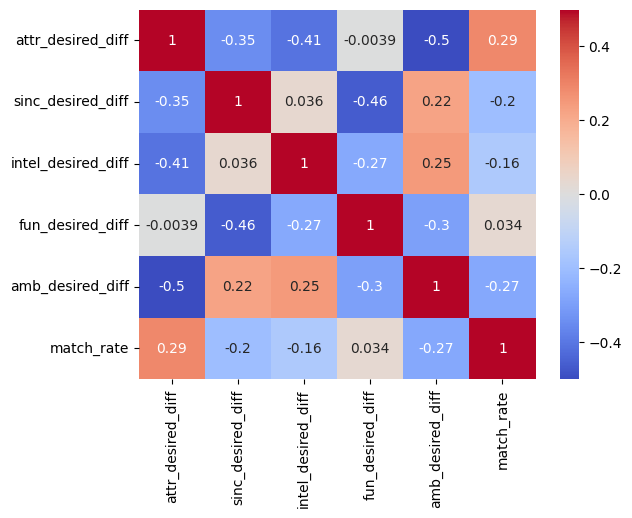

In [55]:
corr = data_match_attributes_differences.corr()
max_value_colour_range = corr[corr != 1].abs().max().max()

sns.heatmap(corr, cmap='coolwarm', center=0,
            annot=True, vmin=-max_value_colour_range, vmax=max_value_colour_range)

I will be using arbitrary guidelines to interpret the strength of correlation between our features:
  
0.0 - 0.1 : non-existent  
0.1 - 0.3 : weak  
0.3 - 0.5 : moderate  
0.5 - 1.0 : strong  

Following these guidelines, we can immediately see that there are actually some non-negligible relationships between the judging differences and match rate! Most notably, we see that the difference of desired attractivity and ambition are positively and negatively correlated with match rate: meaning that the more you match with people that are more attractive than what you wanted, the more likely you are to match in general; and the more likely that you are to match with people that are less ambitious than what you wanted, the less you match with people in general.

Perhaps we can interpret that those who both care less for looks, and often match with people better looking that what they cared for are they themselves attractive (in some regard) individuals. On the other hand, people that say they care about ambition and ultimately do not match with people who are that ambitious are less succesful: does settling in this regard somehow make you less attractive in a discernible and significant way?

As for relationships between our difference features, there are a few that stand out (as having a moderately strong or higher relation):

Attractivity and ambition: -0.5  
Attractivity and sincerity: -0.35  
Attractivity and intelligence: -0.41  
Sincerity and fun: -0.46  
Fun and ambition: -0.3  

All of these strongest correlations are negative, meaning that as either variable increases, the other decreases. In other words, the more you over or underestimate the importance of a certain attribute in your decision-making, the less you will over or underestimate the importance of other attributes. It's hard to ascertain exactly why this phenomena occurs, it is possible that is due to the nature of how our data is derived (a preference is being compared to a rating).


### 5.2 Self-Assesment Accuracy
#### How good are people at judging their own qualities?

In [56]:
# SciPy stats skew() is not very reliable in challenging cases due to its sensitivity to very similar data points and extreme values, so we will instead implement our own
# robust skew algorithm (Bowley Skewness or Quartile Skewness). This will give us a more reliable skewness calculation on our poorly behaved distributions
def robust_skew(x):
    q1, q2, q3 = x.quantile([0.25, 0.5, 0.75])
    return ((q3 + q1 - 2 * q2) / (q3 - q1)) if (q3 - q1) != 0 else 0

In [57]:
# Let's create some lists of columns that we will be using
rating_cols = ['attr', 'sinc', 'intel', 'fun', 'amb']
other_cols = [f"{col}_o" for col in rating_cols]
self_cols = [f"{col}3_1" for col in rating_cols]
diff_cols = [f"{col}_diff" for col in rating_cols]

# We need to create a new dataframe with the average rating that each iid has been given by their partners, and a dataframe with
# the average rating that each iid has given themselves. We will then combine these:
data_rating_by_others = data[['pid', *other_cols]].groupby('pid').agg('mean').reset_index()
data_rating_by_self = data[['iid', *self_cols]].groupby('iid').agg('first').reset_index()
data_self_other_rating = data_rating_by_others.merge(data_rating_by_self,
                                                     left_on='pid',
                                                     right_on='iid',
                                                     how='inner').drop('iid', axis=1).dropna()

# Calculate difference between each of these ratings for each user
data_rate_diff = pd.DataFrame({
    'iid' : data_self_other_rating['pid'], # pid just corresponds to partner iid, which we merged by
    **{f"{col}_diff": data_self_other_rating[self_col] - data_self_other_rating[other_col]
       for col, self_col, other_col in zip(rating_cols, self_cols, other_cols)}, # we use unpacked dictionary comprehension to neatly add all the differences to a df
})

# We also calculate and add add the row statistic columns
data_rate_diff['mean_diff'] = data_rate_diff[[*diff_cols]].mean(axis=1)
data_rate_diff['median_diff'] = data_rate_diff[[*diff_cols]].median(axis=1)
data_rate_diff['abs_diff'] = data_rate_diff[[*diff_cols]].abs().mean(axis=1)
data_rate_diff['skewness'] = data_rate_diff[[*diff_cols]].apply(robust_skew, axis=1)
data_rate_diff['iqr'] = data_rate_diff[[*diff_cols]].abs().apply(lambda x: x.quantile(0.75) - x.quantile(0.25), axis=1)

# Let's also merge the match rate of each iid to analyze later, like we did earlier
data_rate_diff = data_rate_diff.merge(data_by_iid[['iid', 'match_rate']], how='inner', on='iid').drop('iid', axis=1)

data_rate_diff.head()

,attr_diff,sinc_diff,intel_diff,fun_diff,amb_diff,mean_diff,median_diff,abs_diff,skewness,iqr,match_rate
0,0.3000,0.7000,0.7000,1.2000,0.7000,0.7200,0.7000,0.7200,0.0000,0.0000,0.4000
1,0.6000,-2.0000,0.3000,3.9000,-3.5000,-0.1400,0.3000,2.0600,-0.7692,2.9000,0.2000
2,-0.1000,0.4000,-0.4000,0.3000,-0.8000,-0.1200,-0.1000,0.4000,0.1429,0.1000,0.0000
3,0.6000,-0.9000,-1.6000,1.2000,0.2000,-0.1000,0.2000,0.9000,-0.4667,0.6000,0.2000
4,-0.3000,-3.0000,3.0000,0.0000,2.4000,0.4200,0.0000,1.7400,0.7778,2.7000,0.2000


In [58]:
# Let's calculate some statistics on our attributes, rather than on our participants
rate_diff = pd.DataFrame({
    'mean_abs_diff' : data_rate_diff[diff_cols].abs().mean(axis=0),
    'mean_diff' : data_rate_diff[diff_cols].mean(axis=0),
    'median_diff' : data_rate_diff[diff_cols].median(axis=0),
    'iqr' : data_rate_diff[diff_cols].apply(lambda x: x.quantile(0.75) - x.quantile(0.25)),
    'skewness' : data_rate_diff[diff_cols].apply(robust_skew),
})

rate_diff.head()

,mean_abs_diff,mean_diff,median_diff,iqr,skewness
attr_diff,1.5598,0.8936,0.9048,2.0996,-0.0103
sinc_diff,1.5991,1.0696,1.1333,2.0821,0.0314
intel_diff,1.3451,1.0022,1.0000,1.7453,-0.0021
fun_diff,1.7023,1.2622,1.3000,2.0079,-0.0814
amb_diff,1.6797,0.7677,0.8500,2.5307,0.0121


#### Visual exploration

Let's look at the distribution of differences across each attribute

In [59]:
data_rate_diff[diff_cols].mean().mean()

0.9990922138492457

In [60]:
px.box(data_rate_diff[diff_cols])

We can see right away that participants on average overestimate their own qualities significantly, by slightly under 1 point across the board:

In [61]:
print(f'The mean difference by column: \n{data_rate_diff[diff_cols].mean()}')
print()
print(f'The mean difference over all columns: {data_rate_diff[diff_cols].mean().mean()}')

The mean difference by column: 
attr_diff    0.8936
sinc_diff    1.0696
intel_diff   1.0022
fun_diff     1.2622
amb_diff     0.7677
dtype: float64

The mean difference over all columns: 0.9990922138492457


All columns hover around the same mean value, other than "fun" and "ambition" that stand out as slightly more and less overestimated respectively.

Attractiveness has the greatest quantity of outliers one of the widest IQRs. Due to the nature of physical looks, it shouldn't be suprising that we find such varying results. One's rating of their looks are be heavily impacted by their self-esteem and confidence, and some may be heavily influenced by social comparisons that they, or others, have made (those who think relative to celebrities, and those who think relative to their friend groups could give themselves significantly different scores despite potentially believing themselves to be at the same absolute level of attractivity).

Let's see if a correlation matrix brings any interesting insights to light:

<Axes: >

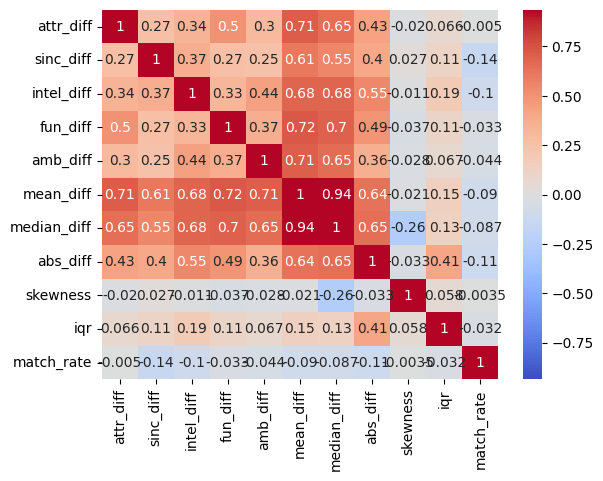

In [62]:
corr = data_rate_diff.corr()

sns.heatmap(corr, cmap='coolwarm', center=0,
            annot=True,
            vmin=-corr[corr != 1].abs().max().max(), vmax=corr[corr != 1].abs().max().max())

Apart from remarking that those who over or underestimate themselves in one regard are likely to do it in others (note the correlation between attractiveness and fun being the strongest, the 2 most classically attractive attributes). Otherwise, there don't seem to be any other significant correlations in this data that we can interpret.

Out of curiousity, we train a multi-linear regression and look at the coefficients to find which of these estimation differences has the largest impact on one's success in the event.

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

model = LinearRegression()
ss = StandardScaler()

x = data_rate_diff.drop('match_rate', axis=1)
y = data_rate_diff['match_rate'].to_frame()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=None, random_state=1)
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

model.fit(x_train, y_train)

cdf = pd.DataFrame(model.coef_.transpose(), x.columns, columns=['coef'])
cdf['coef'] = cdf['coef'] / ss.scale_

print(cdf.sort_values(by='coef', ascending=False, key=abs))

               coef
abs_diff    -0.0226
sinc_diff   -0.0124
attr_diff    0.0068
median_diff -0.0064
iqr          0.0055
fun_diff     0.0054
skewness    -0.0025
mean_diff    0.0005
amb_diff     0.0005
intel_diff   0.0000


We see that the amplitude of misestimations does actually have a negative impact on match rate (each point of over or underestimation reduces one's match rate by 2%), but by an amount that falls within our margin of error. There are no other remarkable relationships.

It seems like, overall, we aren't able to extract many meaningful insights from this data. We can still recapitulate the interesting points we did find:
- Those that misestimate themselves in one attribute are likely to do so with the other attributes (in the same direction ie. all over or all under)
- Participants consistently overestimate themselves by approximately one point

### 5.3 Self-Perception Variance
#### How differently do people rate themselves based on perspective (do they others will rate them differently than they do themselves)?

In [64]:
other_perspective_cols = [f"{col}5_1" for col in rating_cols]

data_rating_other_perspective = data[['iid', *other_perspective_cols]].groupby('iid').agg('first').reset_index()
data_rating_self_perspective = data[['iid', *self_cols]].groupby('iid').agg('first').reset_index()
data_perspective_rating = data_rating_other_perspective.merge(data_rating_self_perspective,
                                                              on='iid',
                                                              how='inner').dropna()

data_perspective_diff = pd.DataFrame({
    'iid' : data_perspective_rating['iid'], # pid just corresponds to partner iid, which we merged by
    **{f"{col}_diff": data_perspective_rating[self_col] - data_perspective_rating[other_perspective_cols]
       for col, self_col, other_perspective_cols in zip(rating_cols, self_cols, other_perspective_cols)}, # we use unpacked dictionary comprehension to neatly add all the differences to a df
})

# We also calculate and add add the row statistic columns, as we did with the previous data we analysed
data_perspective_diff['mean_diff'] = data_perspective_diff[[*diff_cols]].mean(axis=1)
data_perspective_diff['median_diff'] = data_perspective_diff[[*diff_cols]].median(axis=1)
data_perspective_diff['abs_diff'] = data_perspective_diff[[*diff_cols]].abs().mean(axis=1)
data_perspective_diff['skewness'] = data_perspective_diff[[*diff_cols]].apply(robust_skew, axis=1)
data_perspective_diff['iqr'] = data_perspective_diff[[*diff_cols]].abs().apply(lambda x: x.quantile(0.75) - x.quantile(0.25), axis=1)

data_perspective_diff.head()

,iid,attr_diff,sinc_diff,intel_diff,fun_diff,amb_diff,mean_diff,median_diff,abs_diff,skewness,iqr
232,234,-2.0000,1.0000,-1.0000,2.0000,0.0000,0.0000,0.0000,1.2000,0.0000,1.0000
233,235,0.0000,0.0000,-1.0000,0.0000,0.0000,-0.2000,0.0000,0.2000,0.0000,0.0000
234,236,-1.0000,0.0000,0.0000,0.0000,-1.0000,-0.4000,0.0000,0.4000,-1.0000,1.0000
235,237,0.0000,0.0000,-1.0000,0.0000,-2.0000,-0.6000,0.0000,0.6000,-1.0000,1.0000
236,238,1.0000,0.0000,0.0000,1.0000,-1.0000,0.2000,0.0000,0.6000,1.0000,1.0000


In [65]:
# And once again we will recalcuiate statistics by attribute as well
perspective_diff = pd.DataFrame({
    'mean_abs_diff' : data_perspective_diff[diff_cols].abs().mean(axis=0),
    'mean_diff' : data_perspective_diff[diff_cols].mean(axis=0),
    # 'median_diff' : data_perspective_diff[diff_cols].median(axis=0),
    # 'iqr' : data_perspective_diff[diff_cols].apply(lambda x: x.quantile(0.75) - x.quantile(0.25)),
    # 'skewness' : data_perspective_diff[diff_cols].apply(robust_skew),
})

perspective_diff.head()

,mean_abs_diff,mean_diff
attr_diff,0.4490,0.1306
sinc_diff,0.8949,0.4172
intel_diff,0.6019,0.0860
fun_diff,0.7484,0.2834
amb_diff,1.1019,0.0000


Let's add the match rate by IID and see if there are any interesting correlations right off the bat.

<Axes: >

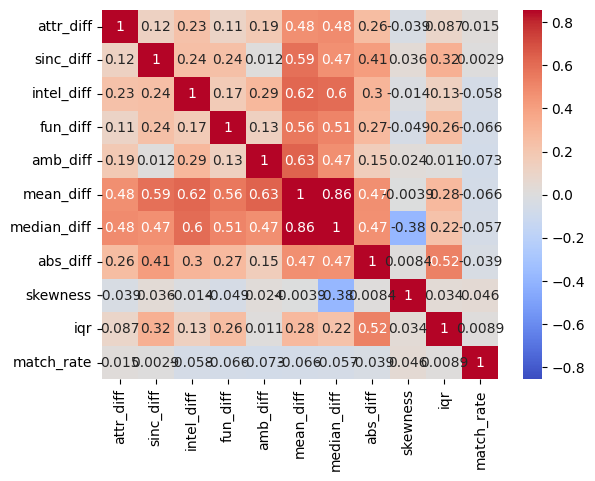

In [66]:
data_perspective_diff = data_perspective_diff.merge(data_by_iid[['iid', 'match_rate']], how='inner', on='iid')

corr = data_perspective_diff.drop('iid', axis=1).corr()

sns.heatmap(corr, cmap='coolwarm', center=0,
            annot=True,
            vmin=-corr[corr != 1].abs().max().max(), vmax=corr[corr != 1].abs().max().max())

We mostly see weak correlations across the board, without any noticeable correlations between our columnns and a partipant's match rate.

In [67]:
fig = go.Figure(go.Scatterpolar(
    r=perspective_diff['mean_abs_diff'],
    theta=perspective_diff.index,
))

fig.show()

Interestingly enough, the mean absolute difference in perspective rating increases roughly in the same order the attributes were rated in.

Let's see if we can find some interesting links between theses perspective differences and a participant's interests?

In [68]:
interests_columns = data.loc[:,'sports':'yoga'].columns
data_perspective_interests = data_by_iid[['iid', *interests_columns]].merge(data_perspective_diff[['iid', 'abs_diff']], )

In [87]:
import random
from plotly.subplots import make_subplots

trend_by_interest = []

# Declare some figure parameters
y_jitter_strength = 0.05
x_jitter_strength = y_jitter_strength * 8
plot_margin = 20

# Create subplot
fig = make_subplots(
    rows=5, cols=4,
    subplot_titles=interests_columns,
    horizontal_spacing=0.05,
    vertical_spacing=0.1
    )

# Create plot in subplot for every interest
for i, interest in enumerate(interests_columns):
    
    # Loop through rows and columns
    col = (i%4) + 1
    row = i//4 + 1
    
    # Set x and y as interest and absolute diff
    x = data_perspective_interests[interest].apply(lambda x: x + random.uniform(-x_jitter_strength, x_jitter_strength))
    y = data_perspective_interests['abs_diff'].apply(lambda x: x + random.uniform(-y_jitter_strength, y_jitter_strength))
    
    # Add scatter plot to every plot
    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        mode='markers',
        showlegend=False,
    ), row=row, col=col,)
    
    # Calculate trendline for every interest
    model = LinearRegression()
    x_reshaped = np.array(x).reshape(-1,1)
    model.fit(x_reshaped, y)
    trendline = model.predict(x_reshaped)
    
    # Add trendline to plot
    fig.add_trace(go.Scatter(
        x=x,
        y=trendline,
        mode='lines',
        showlegend=False,
        line=dict(color='red')
    ), row=row, col=col)
    
    print(interest, round(model.coef_[0], 2))
    trend_by_interest.append(model.coef_[0])
    
# Update layout to beautify
fig.update_layout(title_text="Impact of Absolute Difference on Interest",
                  template='ggplot2',
                  margin=dict(l=plot_margin, r=plot_margin, t=plot_margin*3, b=plot_margin))  
fig.update_xaxes(range=[0,10])
fig.update_yaxes(range=[0,4])
fig.update_traces(marker=dict(color='grey'))

fig.show()

sports -0.01
tvsports -0.02
exercise -0.01
dining -0.02
museums -0.03
art -0.02
hiking 0.02
gaming 0.02
clubbing -0.01
reading -0.03
tv -0.01
theater -0.02
movies -0.03
concerts 0.0
music 0.0
shopping -0.02
yoga -0.01


In [104]:
print(
    "Min: ", round(np.max(trend_by_interest), 3),
    "Max: ", round(np.min(trend_by_interest), 3),
    "Mean: ", round(np.mean(trend_by_interest), 3),
)

Min:  0.024 Max:  -0.027 Mean:  -0.011


Overall, there seems to be no relation between someone's inaccuracy in self-juddgement based on perspective and the activities they are interested in.

There are a few minor variations across the activities but no drastic changes, with the largest linear relation coefficient being 2.5% or -2.7% (for each 1 point increase interest in an activity, a participant has a 2.7% decrease in their self-perception difference). It seems like an increased interest in any given activity does generally cause a downward trend in the spread of their judgement ratings, maybe we can suppose that those who are more certain of their interests, or those that have strong interests, are more confident that others will perceive them the way they perceive themselves (after all, when you show you are interested by something, you are also showing others who you are).

People seem to generally have a consistent sense of their interests regardless of how differently they believe others will perceive them.

## Final insights and conclusion

**General Trends:**

* **Data Quality:** The dataset exhibits a decreasing rate of response over time, likely due to participant disengagement or a lack of follow-up incentives.
* **Confidence and Interest:** Participants who express interest and confidence are more likely to secure matches and second dates, highlighting the importance of assertiveness in dating interactions.
* **Race Preference:** A negative correlation exists between prioritizing race in a partner and obtaining a second date, suggesting that openness to diversity may be advantageous.

**Desired Qualities vs. Reality:**

* **Self-Assessment Accuracy:** Participants generally have a good understanding of their own qualities, but they tend to overvalue attractiveness and undervalue ambition.
* **Attribute Overestimation:** Participants overestimate their attraction to traditional attributes like physical attractiveness and shared interests while underestimating the importance of sincerity and ambition.
* **Partner Attraction:** Matching with someone perceived as more attractive can enhance one's own perceived attractiveness, while matching with someone less ambitious than desired can diminish it.
* **Misestimation Patterns:** Overestimating one attribute often correlates with estimating others more correctly.

**Self-Assessment vs. Reality:**

* **Attractiveness Misperception:** Attractiveness is the most frequently misestimated attribute, easily influenced by factors such as self-esteem and social context.
* **Attribute Misestimation Patterns:** Misestimating one attribute tends to lead to misestimating others, indicating a broader pattern of self-perception distortion.
* **Overestimation Bias:** Participants generally overestimate their qualities by an average of one point on a 10-point scale.

**Self-Perception Variance:**

* **Self-perception by perspective** While we noticed a few interesting patterns, there were no strong notable correlations that we can use to infer human behaviours.
* **Activity Interest and Self-Perception:** While minor variations exist, there's no significant correlation between interest in activities and self-perception differences. A (very) slight trend suggests that individuals with strong interests may be more confident in their self-perception, potentially due to a clear sense of identity.

**Overall, the analysis reveals that while participants are generally accurate in self-assessment, biases and distortions exist, particularly regarding attractiveness and ambition. Confidence, interest, and openness to diversity play crucial roles in successful dating outcomes. Understanding these patterns can provide valuable insights for individuals navigating the complexities of dating and relationships.**